In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:52<00:00, 23.8MB/s]
100% 1.06G/1.06G [00:52<00:00, 21.9MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [5]:
#Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#Normalization
def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
#Create a CNN Model
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 127, 127, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                      

In [8]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 93ms/step - loss: 2.2282 - accuracy: 0.5980 - val_loss: 0.6393 - val_accuracy: 0.6390
Epoch 2/10
625/625 [==============================] - 55s 88ms/step - loss: 0.5631 - accuracy: 0.7104 - val_loss: 0.5365 - val_accuracy: 0.7212
Epoch 3/10
625/625 [==============================] - 59s 93ms/step - loss: 0.4805 - accuracy: 0.7720 - val_loss: 0.4904 - val_accuracy: 0.7616
Epoch 4/10
625/625 [==============================] - 58s 92ms/step - loss: 0.4100 - accuracy: 0.8130 - val_loss: 0.6283 - val_accuracy: 0.7430
Epoch 5/10
625/625 [==============================] - 60s 95ms/step - loss: 0.3432 - accuracy: 0.8482 - val_loss: 0.5667 - val_accuracy: 0.7726
Epoch 6/10
625/625 [==============================] - 58s 92ms/step - loss: 0.2808 - accuracy: 0.8788 - val_loss: 0.5195 - val_accuracy: 0.7958
Epoch 7/10
625/625 [==============================] - 54s 86ms/step - loss: 0.2147 - accuracy: 0.9117 - val_loss: 0.6420 - val_accuracy:

In [ ]:
# Ways to reduce Overfitting

# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout (applied this above)
# Batch Normalization (applied this above)
# Reduce Complexity

In [10]:
import cv2
import matplotlib.pyplot as plt

In [20]:
test_img = cv2.imread('/content/cat.jpg')

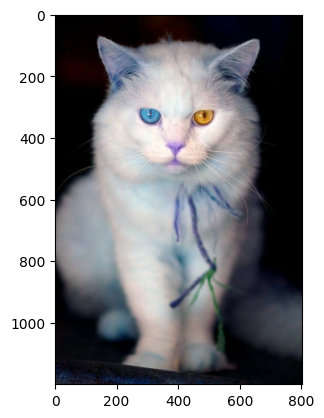

In [21]:
plt.imshow(test_img)

In [22]:
test_img.shape

(1200, 801, 3)

In [23]:
test_img = cv2.resize(test_img, (256, 256))

In [24]:
test_input = test_img.reshape((1, 256, 256, 3))

In [25]:
model.predict(test_input)

1/1 [==============================] - 0s 24ms/step


array([[1.]], dtype=float32)